<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n20.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.759334,36.515493,32.040462,-1998.570495,-1855.255207,493.108531,-2348.363738
1,0.0,1.0,81.292869,49.499219,53.632681,3323.057039,3517.481808,511.555004,3005.926804
2,0.0,2.0,91.307777,77.483620,95.254044,-2088.696184,-1814.650744,484.356008,-2299.006752
3,0.0,3.0,27.487736,71.311090,87.806161,-1446.761377,-1250.156391,258.146563,-1508.302954
4,0.0,4.0,75.099200,77.539970,21.356608,3774.815562,3958.811340,814.021443,3144.789897
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,62.672249,47.972273,52.153350,81.991164,254.789036,445.283481,-190.494446
249996,999.0,246.0,37.462530,92.667218,74.859131,4124.504077,4339.492956,842.876927,3496.616029
249997,999.0,247.0,29.654878,62.589150,33.167258,484.519860,619.931146,613.134301,6.796845
249998,999.0,248.0,39.420071,72.071098,24.403819,-1216.269755,-1070.374766,795.345332,-1865.720098


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.759334,36.515493,32.040462,-1998.570495,-1855.255207,493.108531,-2348.363738
1,0.0,1.0,81.292869,49.499219,53.632681,3323.057039,3517.481808,511.555004,3005.926804
2,0.0,2.0,91.307777,77.483620,95.254044,-2088.696184,-1814.650744,484.356008,-2299.006752
3,0.0,3.0,27.487736,71.311090,87.806161,-1446.761377,-1250.156391,258.146563,-1508.302954
4,0.0,4.0,75.099200,77.539970,21.356608,3774.815562,3958.811340,814.021443,3144.789897
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,62.672249,47.972273,52.153350,81.991164,254.789036,445.283481,-190.494446
249996,999.0,246.0,37.462530,92.667218,74.859131,4124.504077,4339.492956,842.876927,3496.616029
249997,999.0,247.0,29.654878,62.589150,33.167258,484.519860,619.931146,613.134301,6.796845
249998,999.0,248.0,39.420071,72.071098,24.403819,-1216.269755,-1070.374766,795.345332,-1865.720098


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    64.759334  36.515493  ...  493.108531 -2348.363738
      1.0    81.292869  49.499219  ...  511.555004  3005.926804
      2.0    91.307777  77.483620  ...  484.356008 -2299.006752
      3.0    27.487736  71.311090  ...  258.146563 -1508.302954
      4.0    75.099200  77.539970  ...  814.021443  3144.789897
...                ...        ...  ...         ...          ...
999.0 245.0  62.672249  47.972273  ...  445.283481  -190.494446
      246.0  37.462530  92.667218  ...  842.876927  3496.616029
      247.0  29.654878  62.589150  ...  613.134301     6.796845
      248.0  39.420071  72.071098  ...  795.345332 -1865.720098
      249.0  67.592388  56.897501  ...  443.376619 -4219.344643

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    64.759334  36.515493  ...  493.108531 -2348.363738
      1.0    81.292869  49.499219  ...  511.555004  3005.926804
      2.0    91.307777  77.483620  ...  484.356008 -2299.006752
      3.0    27.487736  71.311090  ...  258.146563 -1508.302954
      4.0    75.099200  77.539970  ...  814.021443  3144.789897
...                ...        ...  ...         ...          ...
999.0 245.0  62.672249  47.972273  ...  445.283481  -190.494446
      246.0  37.462530  92.667218  ...  842.876927  3496.616029
      247.0  29.654878  62.589150  ...  613.134301     6.796845
      248.0  39.420071  72.071098  ...  795.345332 -1865.720098
      249.0  67.592388  56.897501  ...  443.376619 -4219.344643

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.759334,36.515493,32.040462,-1998.570495,-1855.255207,493.108531,-2348.363738
1,0.0,1.0,81.292869,49.499219,53.632681,3323.057039,3517.481808,511.555004,3005.926804
2,0.0,2.0,91.307777,77.483620,95.254044,-2088.696184,-1814.650744,484.356008,-2299.006752
3,0.0,3.0,27.487736,71.311090,87.806161,-1446.761377,-1250.156391,258.146563,-1508.302954
4,0.0,4.0,75.099200,77.539970,21.356608,3774.815562,3958.811340,814.021443,3144.789897
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,62.672249,47.972273,52.153350,81.991164,254.789036,445.283481,-190.494446
249996,999.0,246.0,37.462530,92.667218,74.859131,4124.504077,4339.492956,842.876927,3496.616029
249997,999.0,247.0,29.654878,62.589150,33.167258,484.519860,619.931146,613.134301,6.796845
249998,999.0,248.0,39.420071,72.071098,24.403819,-1216.269755,-1070.374766,795.345332,-1865.720098


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    64.759334  36.515493  ...  493.108531 -2348.363738
      1.0    81.292869  49.499219  ...  511.555004  3005.926804
      2.0    91.307777  77.483620  ...  484.356008 -2299.006752
      3.0    27.487736  71.311090  ...  258.146563 -1508.302954
      4.0    75.099200  77.539970  ...  814.021443  3144.789897
...                ...        ...  ...         ...          ...
999.0 245.0  62.672249  47.972273  ...  445.283481  -190.494446
      246.0  37.462530  92.667218  ...  842.876927  3496.616029
      247.0  29.654878  62.589150  ...  613.134301     6.796845
      248.0  39.420071  72.071098  ...  795.345332 -1865.720098
      249.0  67.592388  56.897501  ...  443.376619 -4219.344643

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

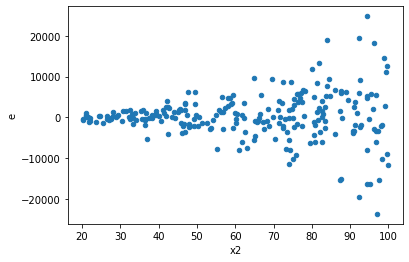

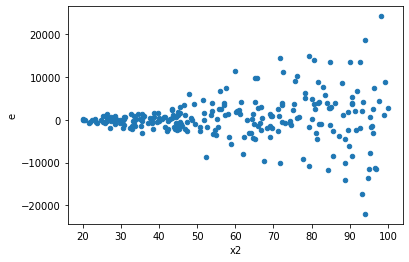

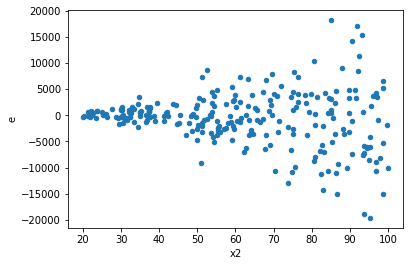

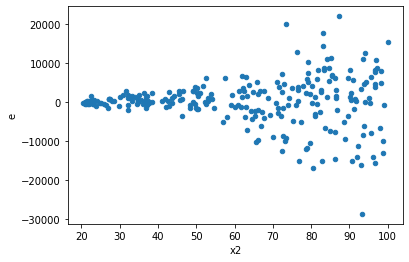

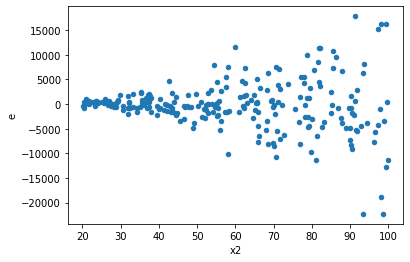

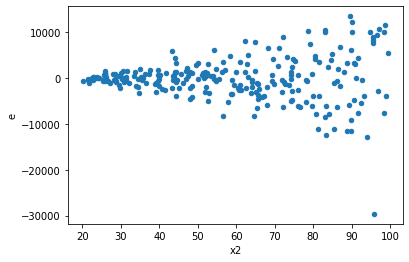

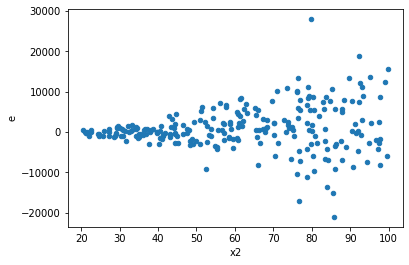

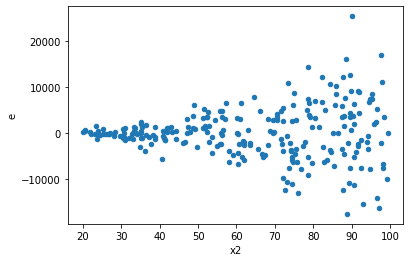

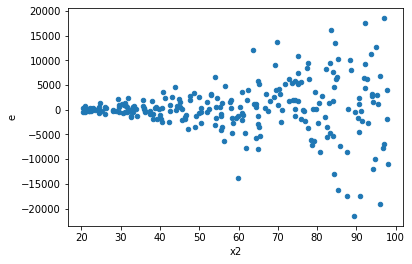

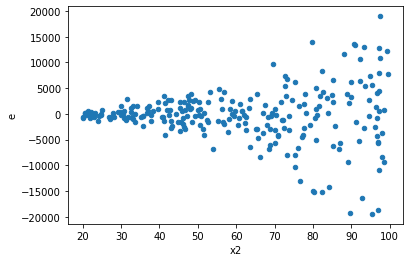

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,6854515034.203289,389501839.8298786,71401198.27295093,4057310.8315612357,17.59815829675442,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,5627834562.530628,190556674.8893453,58623276.69302738,1984965.36343068,29.533652210286867,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,5478373121.101559,493309237.60246074,57066386.67814124,5138637.891692299,11.105352796000897,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,7904641045.623112,240270079.21676347,82340010.89190741,2502813.3251746194,32.89898214289018,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,5111070384.109722,173583654.96811908,53240316.50114294,1808163.0725845739,29.444421970769294,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,4735782500.177658,260753334.72283491,49331067.71018394,2716180.57002953,18.161924967178308,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,6249080237.624336,354933940.2980345,65094585.808586836,3697228.5447711926,17.60631917132818,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,6159213830.286589,370976888.8620363,64158477.398818634,3864342.592312878,16.602688779831666,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,5635438279.702865,193636529.43213785,58702482.08023817,2017047.1815847692,29.103177464652244,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,6854515034.203289,389501839.8298786,71401198.27295093,4057310.8315612357,17.59815829675442,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,5627834562.530628,190556674.8893453,58623276.69302738,1984965.36343068,29.533652210286867,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,5478373121.101559,493309237.60246074,57066386.67814124,5138637.891692299,11.105352796000897,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,7904641045.623112,240270079.21676347,82340010.89190741,2502813.3251746194,32.89898214289018,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,5111070384.109722,173583654.96811908,53240316.50114294,1808163.0725845739,29.444421970769294,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,4735782500.177658,260753334.72283491,49331067.71018394,2716180.57002953,18.161924967178308,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,6249080237.624336,354933940.2980345,65094585.808586836,3697228.5447711926,17.60631917132818,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,6159213830.286589,370976888.8620363,64158477.398818634,3864342.592312878,16.602688779831666,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,5635438279.702865,193636529.43213785,58702482.08023817,2017047.1815847692,29.103177464652244,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64